In [33]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime
import itertools

#### Figure aesthetics

In [34]:
#print(plt.style.available)
plt.style.use('seaborn-poster')
plt.style.use('seaborn-whitegrid')

#### Downlad data

In [35]:
def get_data():
    ##Get data from the source that is used to generate map (based on WHO official data):
    ##https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html?fbclid=IwAR0oKIKJlc-zeNZGFBVEN0-O-58daoCDaKicXwC10cjFWgCZqTPgavseTfI#/bda7594740fd40299423467b48e9ecf6
    url_confirmed = "https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
    url_deaths = "https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
    url_recovered = "https://raw.github.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
    
    for url, data_type in zip([url_confirmed, url_deaths, url_recovered], ["confirmed", "deaths", "recovered"]):
    
        r = requests.get(url)
        filename=data_type+".csv"
        f = open(filename,'wb')
        f.write(r.content)

In [36]:
get_data()

#### Prepare dataset

In [37]:
## prepare dataset
confirmed = pd.read_csv("confirmed.csv")
deaths = pd.read_csv("deaths.csv")
recovered = pd.read_csv("recovered.csv")

def reshape_single_dataset(data):
    data=data.drop(columns=["Province/State", "Lat", "Long"])
    ## aggregate data for each country
    data=data.groupby("Country/Region").sum().reset_index()
    ## reshape data
    data.reset_index(drop=True, inplace=True)
    data=data.set_index("Country/Region")
    #data=data.transpose().reset_index().rename(columns={'index':'Date'})
    #data['Date'] = pd.to_datetime(data['Date'])
    
    return data

confirmed = reshape_single_dataset(confirmed)
deaths = reshape_single_dataset(deaths)
recovered = reshape_single_dataset(recovered)

In [38]:
inactive=deaths.add(recovered)
data=confirmed.subtract(inactive)
data=data.transpose().reset_index().rename(columns={'index':'Date'})
data['Date'] = pd.to_datetime(data['Date'])

#### List of countries in dataset

In [ ]:
for el in data.columns:
    print(el)

#### Choose countries to plot (separate by ";" )

In [39]:
countries_to_plot="Germany;France;Poland;Italy;Korea, South;China;United Kingdom".split(";")

#### Make plot

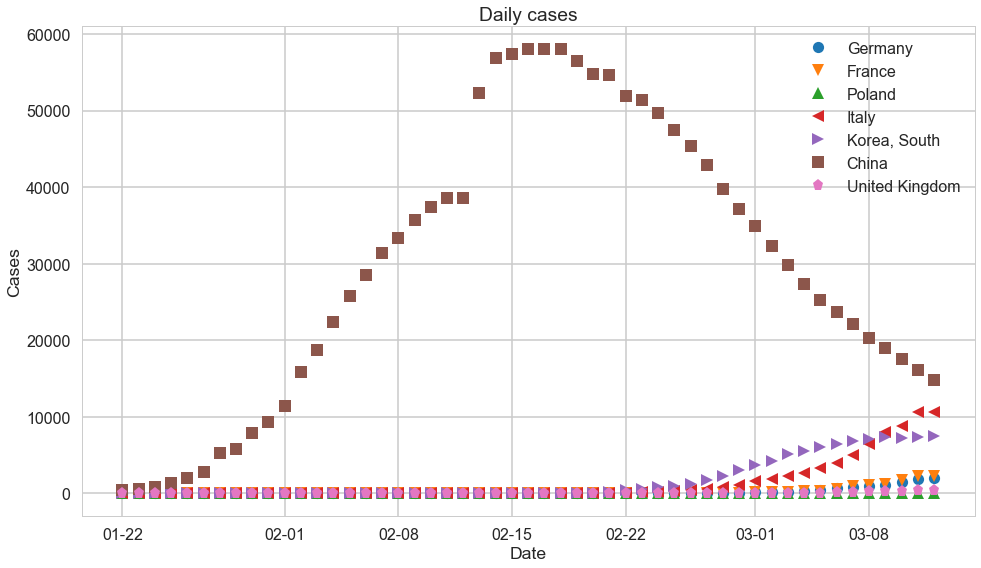

In [40]:
##extract data for each country
dates=data["Date"].values
countries=[]
for country in countries_to_plot:
    countries.append(data[country].values)

## Create figure and plot space
fig, ax = plt.subplots(figsize=(16, 9))
marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', 'p', 'P')) 
## Add x-axis and y-axis
for country, country_name in zip(countries, countries_to_plot):
    ax.plot(dates, country, marker=next(marker), linestyle='', label=country_name)
## Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Cases",
       title="Daily cases")
## Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

## axes limits
#ax.set_xlim([datetime.date(2020, 2, 10), datetime.date.today() + datetime.timedelta(days=3)])# datetime.date(2020, 3, 15)])
#ax.set_ylim([0,15000])
ax.legend()
plt.show()